In [168]:
import numpy as np
import glob

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology
import skimage.exposure
import skimage.measure
import skimage.segmentation

# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', palette=colors, rc={'axes.labelsize': 16})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [169]:
# Get list of bacillus subtilis image files
bac_list = glob.glob('/Users/arman/git/bootcamp/data/bacterial_growth/bacillus_*.tif')

# Initialize list of images
img_list = []

# Load in each sequentially
for img_file in bac_list:
    
    # Read in image
    img = skimage.io.imread(img_file)
    
    # Place in list
    img_list.append(img)

/Users/arman/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


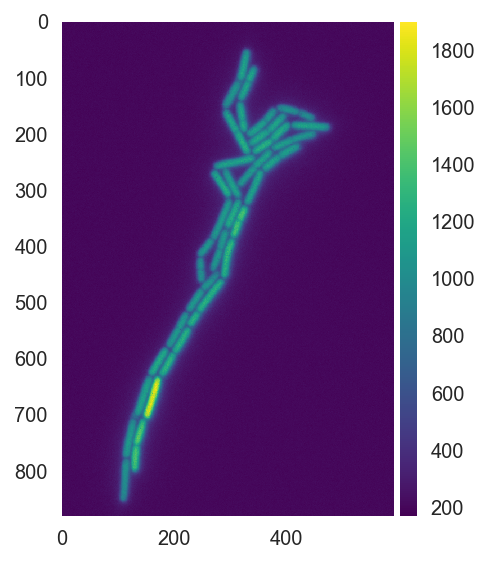

In [170]:
with sns.axes_style('dark'):
    skimage.io.imshow(img_list[54])

/Users/arman/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


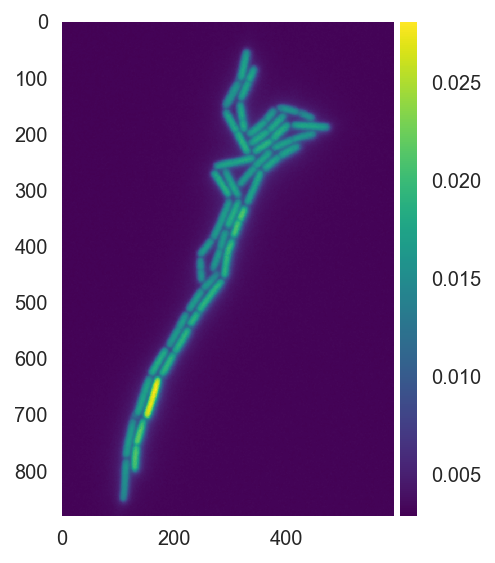

In [186]:
# Apply morphology and median filter
selem = skimage.morphology.square(3)

img_filt_list = []

for i in range(55):
    md = skimage.img_as_float(skimage.filters.median(img_list[i], selem))
    
    img_filt_list.append(md)
    
    
with sns.axes_style('dark'):
    skimage.io.imshow(img_filt_list[54])

/Users/arman/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


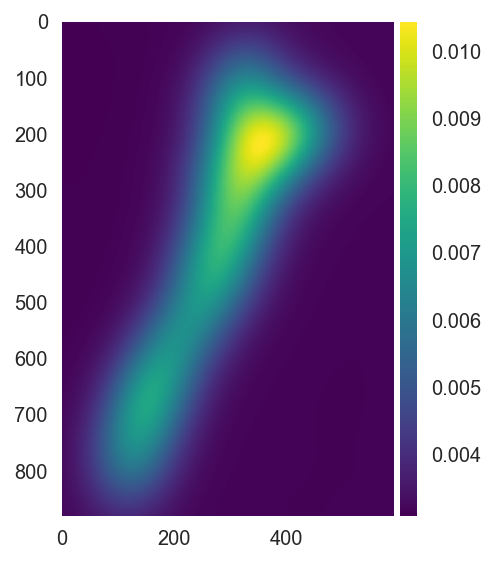

In [172]:
# Apply gaussian filter
img_filt_gb = []

for i in range(55):
    gb = skimage.filters.gaussian(img_filt_list[i], 50.0)
    
    img_filt_gb.append(gb)

        
with sns.axes_style('dark'):
    skimage.io.imshow(img_filt_gb[54])

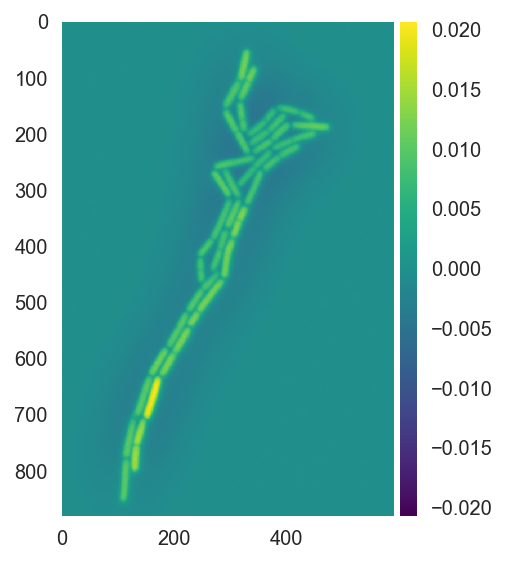

In [185]:
# Background subtraction
img_sub = []

for i in range(55):
    sub = skimage.img_as_float(img_filt_list[i]) - img_filt_gb[i]

    img_sub.append(sub)
    
with sns.axes_style('dark'):
    skimage.io.imshow(img_sub[54], cmap=plt.cm.viridis)

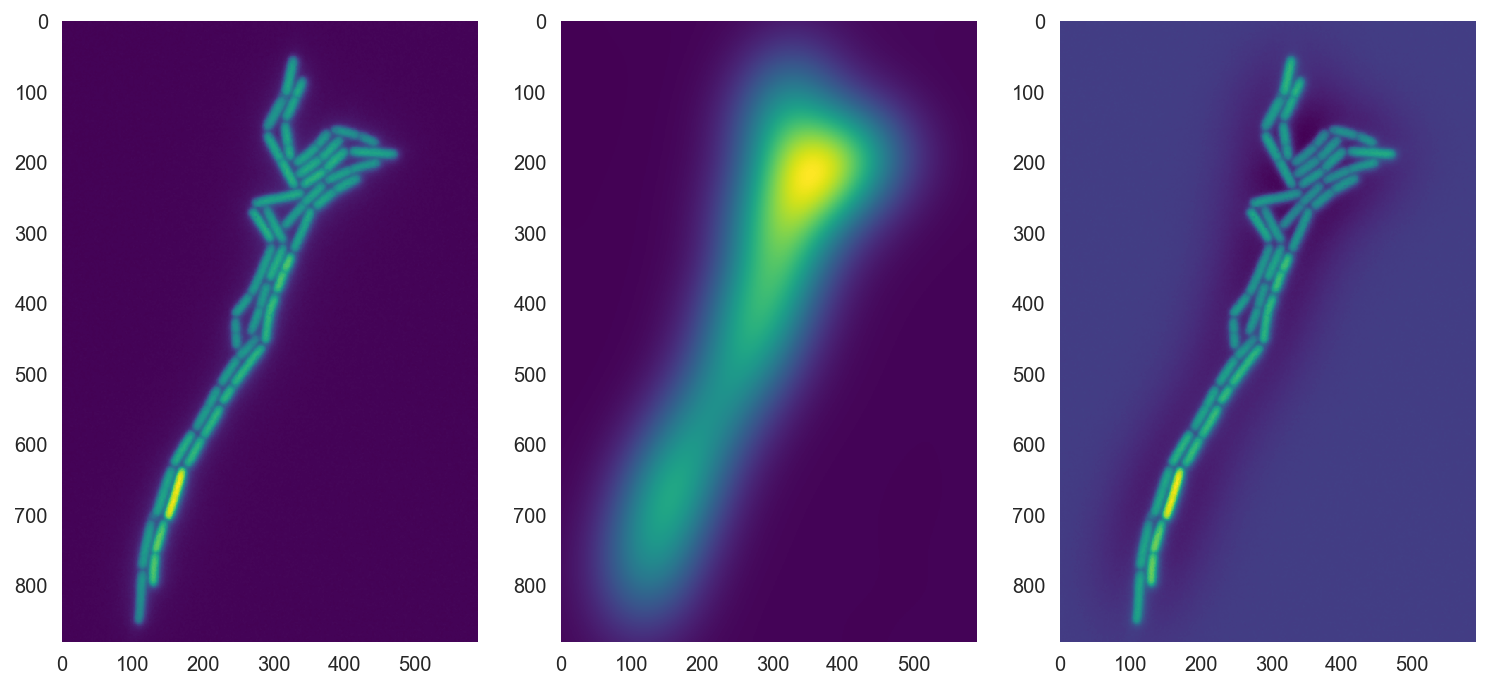

In [184]:
# Display the change taking place: [0] - [1] = [2]
with sns.axes_style('dark'):
    fig, ax = plt.subplots(1, 3, figsize=(19/1.5, 16/1.5))
    ax[0].imshow(img_filt_list[54], cmap=plt.cm.viridis)
    ax[1].imshow(img_filt_gb[54], cmap=plt.cm.viridis)
    ax[2].imshow(img_sub[54], cmap=plt.cm.viridis)

In [175]:
# Compute Otsu thresholds

thresh_list = []

for i in range(55):
    tf = skimage.filters.threshold_otsu(img_list[i])
    
    thresh_list.append(tf)